In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_pickle('tesco_data_5.pkl')

In [3]:
df.columns

Index(['Site Number', 'Site Name', 'Transaction Date', 'Total Sales Value',
       'Total Baskets', 'Sales Baskets With Fuel', 'Baskets With Fuel',
       'Site ID', 'PBL', 'CRUSO_priceADO', 'CRUSO_priceUL95', 'volumeADO',
       'volumeUL95', 'sales_valADO', 'sales_valUL95', 'totalSalesEsso',
       'pct_dev', 'diff_shop_esso'],
      dtype='object')

In [5]:
df['Site Name'].value_counts()

ADDISCOMBE EXPRESS       373
NEWCASTLE WEST RD EXP    373
OLDSWINFORD EXPRESS      373
ERDINGTON EXPRESS        373
GOWERTON EXPRESS         373
STAFFORD EXPRESS         373
STORRINGTON EXPRESS      373
BEWDLEY HILL KIDD EXP    373
COMBE DOWN EXPRESS       373
RUSHOLME EXPRESS         373
CHALFONT EXPRESS         373
CAVERSHAM EXPRESS        373
CHADDESDEN EXPRESS       373
SOUTH HAYES EXPRESS      373
BUSHBURY EXPRESS         373
HIGHLND RD DUDLEY EXP    372
POLEGATE EXPRESS         372
HEAVITREE EXPRESS        372
COWLEY EXPRESS           372
SOUTH OXHEY EXPRESS      372
OLTON EXPRESS            372
NEW PRK THNTN HTH EXP    372
EYNSHAM EXPRESS          372
YATELEY EXPRESS          372
STANMORE MIDDLESX EXP    372
CHRISTCHURCH EXPRESS     372
DOSTHILL TAMWORTH EXP    371
TUPSLEY EXPRESS          371
TONBRIDGE RD EXP         371
HARTSHILL EXPRESS        371
                        ... 
ROMFORD EXPRESS          348
ROWLEY FIELD LEIC EXP    347
CHURCHTOWN EXPRESS       347
LEIGH ON SEA E

In [10]:
df_1 = df.query('PBL == 201013').set_index('Transaction Date')

df_1[['Total Sales Value','totalSalesEsso']].plot()

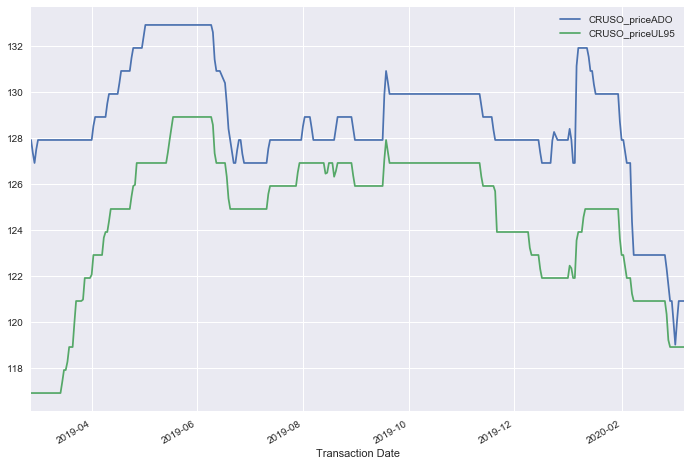

In [12]:
df_1[['CRUSO_priceADO', 'CRUSO_priceUL95']].plot()

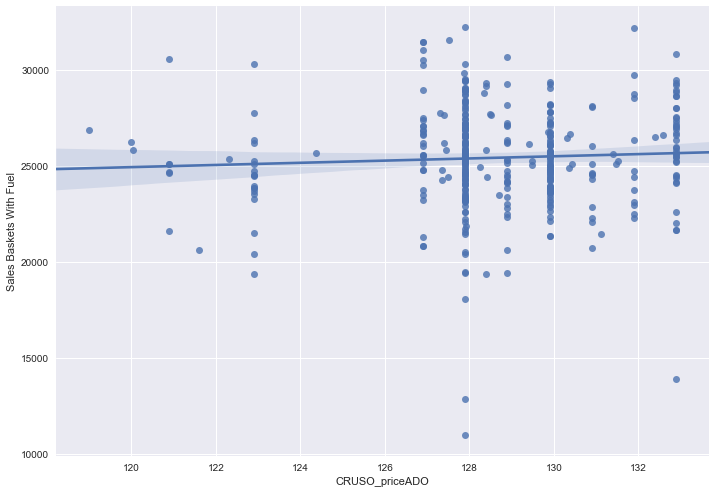

In [14]:
ax = sns.regplot(x="CRUSO_priceADO", y="Sales Baskets With Fuel", data=df_1)
plt.show(ax)

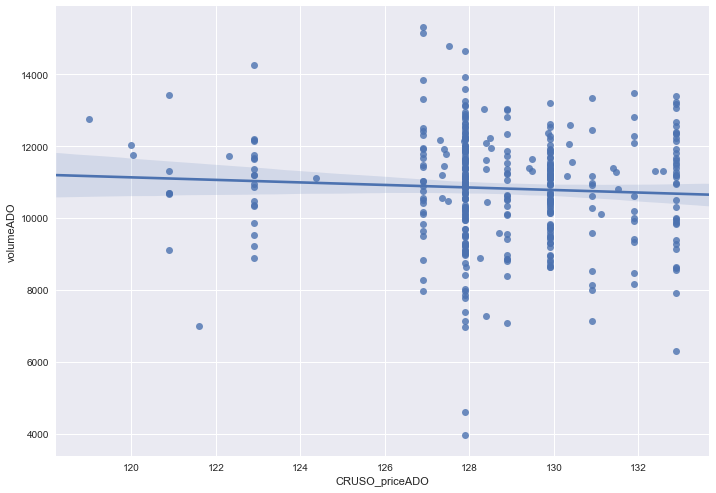

In [16]:
ax = sns.regplot(x="CRUSO_priceADO", y="volumeADO", data=df_1)
plt.show(ax)

In [17]:
df_1['quantile_ADO_price'] = pd.qcut(df_1['CRUSO_priceADO'], q=4)

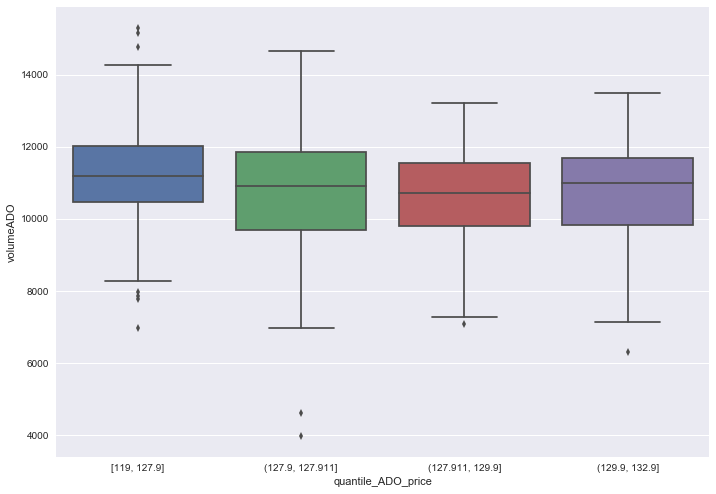

In [19]:
sns.boxplot(x='quantile_ADO_price', y='volumeADO', data=df_1)

In [39]:
df_1.groupby('quantile_ADO_price')['volumeADO'].describe().unstack()

count      mean      std      min       25%       50%  \
quantile_ADO_price                                                          
[119, 127.9]        94.00 11,213.35 1,540.72 6,986.00 10,470.00 11,200.00   
(127.9, 127.911]    93.00 10,645.63 1,738.55 3,967.00  9,683.00 10,902.00   
(127.911, 129.9]    93.00 10,704.83 1,280.48 7,074.00  9,806.00 10,716.00   
(129.9, 132.9]      93.00 10,736.73 1,498.85 6,309.00  9,846.00 10,988.00   

                         75%       max  
quantile_ADO_price                      
[119, 127.9]       12,024.25 15,311.00  
(127.9, 127.911]   11,858.00 14,653.00  
(127.911, 129.9]   11,565.00 13,209.00  
(129.9, 132.9]     11,682.00 13,484.00

In [40]:
df.to_excel(r'data_pvo_viz.xlsx',index=False)

In [43]:
#import xml.etree.ElementTree as ET

In [44]:
df.columns

Index(['Site Number', 'Site Name', 'Transaction Date', 'Total Sales Value',
       'Total Baskets', 'Sales Baskets With Fuel', 'Baskets With Fuel',
       'Site ID', 'PBL', 'CRUSO_priceADO', 'CRUSO_priceUL95', 'volumeADO',
       'volumeUL95', 'sales_valADO', 'sales_valUL95', 'totalSalesEsso',
       'pct_dev', 'diff_shop_esso'],
      dtype='object')

In [ ]:
df_chg = df.sort_values('Transaction Date').pivot_table(index='Transaction Date',
                                                       columns=[''])

In [45]:
df.groupby('Site Name')['CRUSO_priceADO'].pct_change()

0         nan
1       -0.00
2        0.00
3       -0.00
4        0.00
5       -0.00
6       -0.00
7        0.00
8        0.00
11      -0.00
12       0.00
13       0.00
14      -0.00
15      -0.00
16       0.00
17       0.00
18      -0.00
19      -0.00
20       0.00
21      -0.00
22      -0.00
23       0.00
24       0.00
25       0.00
26       0.00
27       0.00
28      -0.00
29      -0.00
30       0.00
31      -0.00
         ... 
73565   -0.00
73566   -0.00
73567   -0.01
73568   -0.01
73569    0.00
73570   -0.00
73571    0.00
73572   -0.00
73573    0.00
73574    0.00
73575    0.02
73576   -0.00
73577   -0.00
73578   -0.01
73579   -0.00
73580    0.00
73581   -0.00
73582   -0.00
73583   -0.00
73584    0.00
73585   -0.00
73586   -0.01
73587   -0.00
73588   -0.00
73589    0.00
73590   -0.00
73591    0.00
73592   -0.00
73593   -0.00
73594    0.00
Name: CRUSO_priceADO, dtype: float64